# Choosing Best n_estimators for RandomForest model without retraining
> RandomForest is always an easy-to-go algorithm but determining the best n_estimators can be very computationally intensive. In this tutorial, we will find a way to detrmine the best n_estimators without retraining. 

- toc:true
- branch: master
- badges: true
- comments: true
- author: Ahmed Abulkhair
- categories: [Machine Learning, RandomForest, Classification, Python]
- image: images/rf.png

In this notebook, we will try to determine the best number of `n_estimators` for RandomForest model without training the model for multiple times

### Load Dataset

We will use one of the built-in datasets, which is `digits`

In [1]:
# Import datasets
import sklearn.datasets
from sklearn.model_selection import train_test_split
# Load dataset
X, y = sklearn.datasets.load_digits(n_class = 10,return_X_y = True)
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y)

### Import libraries

In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Step 1:** first fit a Random Forest to the data. Set `n_estimators` to a high value.

In [3]:
rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, n_jobs=-1)

**Step 2:** Get predictions for each tree in Random Forest separately.

In [4]:
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_val)[None, :])

**Step 3:** Concatenate the predictions to a tensor of size `(number of trees, number of objects, number of classes)`.

In [5]:
predictions = np.vstack(predictions)

**Step 4:** Сompute cumulative average of the predictions. That will be a tensor, that will contain predictions of the random forests for each `n_estimators`.

In [6]:
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]

**Step 5:** Get accuracy scores for each `n_estimators` value

In [7]:
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_val, np.argmax(pred, axis=1)))

**That is it!** Plot the resulting scores to obtain similar plot to one that appeared on the slides.

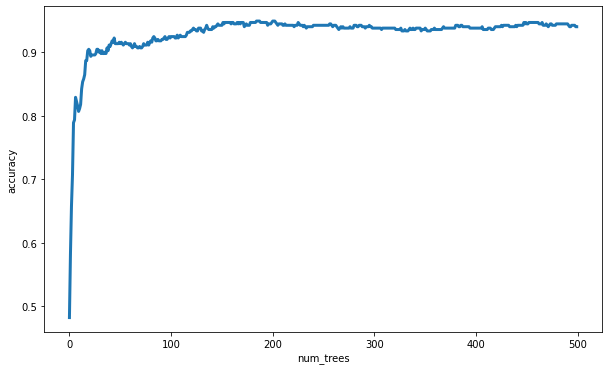

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');

We see, that 150 trees are already sufficient to have stable result.